<a href="https://colab.research.google.com/github/jvataidee/MachineLearning/blob/master/Classifica%C3%A7%C3%A3o_de_Roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img src="https://static.wixstatic.com/media/bdd7cb_7cbf8aa255ec468a97ab036d55c121c3~mv2.png/v1/fill/w_408,h_86,al_c,q_85,usm_0.66_1.00_0.01/Ativo%2013%404x.webp" height="80px"></p>


# Classificação de Roupas
***Fashion MNIST*** é um *dataset* padrão usado em **Deep Learning** e **Computer Vision**, contendo 70 mil imagens de 10 classes diferentes.

Apesar de trazer imagens já pré-processadas, representa um bom desafio para aplicar redes neurais profundas. Especificamente, serve para demonstrar um tipo especial das redes neurais, as redes neurais convolucionais (*Convolutional Neural Networks* - **CNN**).

Cada imagem pertence exclusivamente a uma única classe. A tabela abaixo segue a documentação do Fashion MNIST, onde são documentados os 10 *labels* possíveis:

<table>
  <tbody><tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</tbody></table>

Este *dataset* foi criado em substituição ao MNIST tradicional, onde as imagens eram puramente de dígitos manuscritos. Dentre os motivos principais, o MNIST origianl era:

* Muito fácil, devido à facilidade de atingir a acurácia de 99,7%.
* Não modernos da área da Visão Computacional.

$$
Fashion MNIST
$$
<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/embedding.gif" height="300px"></p>

*Adaptado de Carlos Melo - Sigmoidal*

## Importação das bibliotecas necessárias
### Configuração de visualização

In [ ]:
# importar as bibliotecas necessárias
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

# configurar a visualização
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

###Carregando os dados da MNIST Fashion, carregando diretamente do TensorFlow


Os dados do Fashion MNIST foi carregando diretamente a partir do TensorFlow.

In [ ]:
# carregar os dados do Fashion MNIST
(X_train_orig, y_train_orig), (X_test_orig, y_test_orig) = keras.datasets.fashion_mnist.load_data()

Seguindo a padronização da documentação, criarei uma lista contendo os *labels* traduzidos para o portugês.

In [ ]:
# De acordo com a documentação, os labels são:
class_names = ['Camisetas/Top', 'Calça', 'Suéter',
               'Vestidos','Casaco', 'Sandálias',
               'Camisas', 'Tênis', 'Bolsa', 'Botas']

## Exploração dos Dados

O *dataset* possui uma documentação bem organizada, desta froma a exploramos rapidamente de modo a tirar alguns *insights*.

* Primeiramente, irei verificar as dimensões dos *arrays*,retornados pela função 'fashion_mnist.load_data()'.

In [ ]:
# ver a dimensionalidade dos DataFrames
print("Dimensionalidade dos DataFrames:")
print("X_train_orig:", X_train_orig.shape)
print("y_train_orig:", y_train_orig.shape)
print("X_test_orig:", X_test_orig.shape)
print("y_test_orig:", y_test_orig.shape)

Dimensionalidade dos DataFrames:
X_train_orig: (60000, 28, 28)
y_train_orig: (60000,)
X_test_orig: (10000, 28, 28)
y_test_orig: (10000,)


Conforme visto anteriormente, há 60.000 amostras de treino e 10.000 de teste, sendo as imagens 28 x 28 *pixels* em tons de cinza (1 canal).

Também é possível ver como uma imagem "se parece" quando é convertida para um *array*. Vale lembrar que os valores de cada *pixel* estão compreendidos entre $[0, 255]$.

In [ ]:
# ver uma fatia de uma imagem
print("\n\nImagem convertida em array:\n", X_train_orig[0][:5][:5])



Imagem convertida em array:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]]


*   Irei verificar se os datasets de treino/teste balanceados adequadamente.

 *Ou seja, se contém uma proporção ideal entre as diferentes classes.*



In [ ]:
# verificar os valores únicos por classes (treino)
print("y_train_orig:")
np.unique(y_train_orig, return_counts=True)

y_train_orig:


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [ ]:
# verificar os valores únicos por classes (teste)
print("y_test_orig:")
np.unique(y_test_orig, return_counts=True)

y_test_orig:


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


*   Por fim, vamos visualizar algumas imagens com seus *labels*.


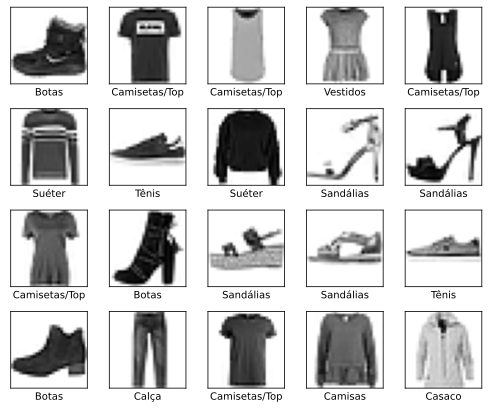

In [ ]:
# ver algumas imagens de exemplo
plt.figure(figsize=(7,7))

for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_orig[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_orig[i]])
plt.tight_layout()

## Pré-Processamento dos Dados

### Normalizar os *pixels*

As intensidades dos *pixels* devem ser normalizadas, ou seja, os valores inteiros devem ser convertidos no tipo 'float' e ficar dentro do intervalo $[0, 1]$.


In [ ]:
# criar função lambda que transforma em float32 e normaliza os pixels
f = lambda x: (x / 255.0).astype("float32")

# aplicar a função lambda aos datasets X_train e X_test
X_train = f(X_train_orig)
X_test = f(X_test_orig)

### Redimensionar as Imagens

O primeiro *layer* convolucional espera um único tensor que contenha todos os *pixels*. <p>
O TensorFlow espera uma única lista com 4 dimensões, e não 60000 itens de dimensões 28 x 28 x 1, como é o caso do *dataset* de treino (o mesmo vale para os dados de teste).

In [ ]:
# redimensionar as imagens
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

print("X_train:{}".format(X_train.shape))
print("X_test:\t{}".format(X_test.shape))

X_train:(60000, 28, 28, 1)
X_test:	(10000, 28, 28, 1)


### One-Hot Encoding

Os *labels* já estão codificados entre 0 e 9, naquilo que chamamos de *Integer Encoding*. É possível utilizar diretamente `y_train` e `y_test`, desde que se use `loss="sparse_categorical_crossentropy"`. No entanto, quando este utilizado diretamente no modelo de *Deep Learning*, entende-se que existe uma relação natural de ordem entre os *labels*, o que não é verdade - podendo levar a um desempenho inferior.

Vejamos um exemplo com Econding e depois do Econding:


In [ ]:
exemplo = np.array([1, 3, 4, 2, 0])
print("Exemplo antes do Encoding:")
print(exemplo)

exemplo_encoded = keras.utils.to_categorical(exemplo)
print("\nExemplo depois do Encoding")
print(exemplo_encoded)

Exemplo antes do Encoding:
[1 3 4 2 0]

Exemplo depois do Encoding
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


Da mesma maneira que o exemplo acima, vamos aplicar a todas as bases de teste e treino.

In [ ]:
y_train = keras.utils.to_categorical(y_train_orig)
y_test = keras.utils.to_categorical(y_test_orig)

## Definindo uma Rede Neural Convolucional

Existem diversas arquiteturas consagradas de CNN. Para este projeto, será utilizada uma arquitetura simplificada da **VGGNet**, implementada em um artigo do Cientista de Dados Adrian Rosebroke. Esta foi praticada na Escola de Data Science do Carlos Melo, do Blog Sigmoidal.

De modo a adequar as dimensões para 28 x 28 e permitir o uso da API Keras, as dimensções da rede original foram adaptadas.

In [ ]:
# baseado na implementação da MiniVGGNet do Adrian Rosebroke
# first CONV => RELU => CONV => RELU => POOL layer set
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, 3, padding="same", activation='relu',))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

# second CONV => RELU => CONV => RELU => POOL layer set
model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

# first (and only) set of FC => RELU layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

# softmax classifier
model.add(keras.layers.Dense(10, activation='softmax'))

Como mencionado anteriormente, uma vez que os *labels* estão *one-hot encoded*, será utilizado `loss="categorical_crossentropy"` para compilar o modelo.

Também será informado explicitamente o uso de dados de validação na proporção de 1/3.

In [ ]:
#compilando a rede
model.compile(optimizer='adam', loss="categorical_crossentropy", 
              metrics=['accuracy'])


In [ ]:
# treinar o modelo e salvar as informações em history
history = model.fit(X_train, y_train, epochs = 20, validation_split = 0.3)

Epoch 1/20
1313/1313 [==============================] - 18s 14ms/step - loss: 0.5516 - accuracy: 0.8095 - val_loss: 0.3529 - val_accuracy: 0.8733
Epoch 2/20
1313/1313 [==============================] - 18s 14ms/step - loss: 0.3408 - accuracy: 0.8763 - val_loss: 0.3334 - val_accuracy: 0.8858
Epoch 3/20
1313/1313 [==============================] - 18s 14ms/step - loss: 0.2985 - accuracy: 0.8924 - val_loss: 0.2466 - val_accuracy: 0.9141
Epoch 4/20
1313/1313 [==============================] - 17s 13ms/step - loss: 0.2758 - accuracy: 0.9012 - val_loss: 0.2557 - val_accuracy: 0.9088
Epoch 5/20
1313/1313 [==============================] - 17s 13ms/step - loss: 0.2556 - accuracy: 0.9079 - val_loss: 0.2335 - val_accuracy: 0.9184
Epoch 6/20
1313/1313 [==============================] - 17s 13ms/step - loss: 0.2348 - accuracy: 0.9148 - val_loss: 0.1980 - val_accuracy: 0.9292
Epoch 7/20
1313/1313 [==============================] - 17s 13ms/step - loss: 0.2202 - accuracy: 0.9198 - val_loss: 0.2070 -

## Avaliando o Modelo

Geralmente, o nosso modelo atingiu uma acurácia de 0.9533 nos dados de treino e 0.9372 nos dados de validação.

No entanto, se observarmos melhor veremos que ela não teve o desempenho bom para a categoria "Camisas". Provavalmente isso pode ser melhorado com técnicas de *data augmentation*.

In [ ]:
y_hat = model.predict(X_test)
y_hat_classes = np.argmax(y_hat, axis=1)
print(classification_report(y_test_orig, y_hat_classes, target_names=class_names))

               precision    recall  f1-score   support

Camisetas/Top       0.89      0.86      0.87      1000
        Calça       0.99      0.99      0.99      1000
       Suéter       0.86      0.92      0.89      1000
     Vestidos       0.94      0.93      0.93      1000
       Casaco       0.90      0.86      0.88      1000
    Sandálias       0.99      0.99      0.99      1000
      Camisas       0.78      0.78      0.78      1000
        Tênis       0.97      0.98      0.98      1000
        Bolsa       0.98      0.99      0.99      1000
        Botas       0.98      0.97      0.97      1000

     accuracy                           0.93     10000
    macro avg       0.93      0.93      0.93     10000
 weighted avg       0.93      0.93      0.93     10000



Olhando as curvas *accuracy* e *val_accuracy*, identifica-se talvez um pequeno *overfitting*, mas que não prejudicou muito o desempenho da CNN perante aos dados de validação.

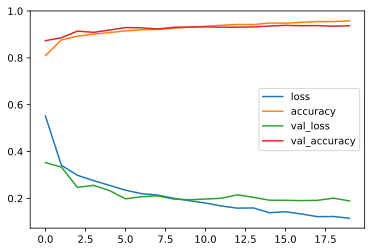

In [ ]:
# plotar o histórico da otimização
pd.DataFrame(history.history).plot()
plt.show()

Por fim, vemos que a acurácia no *dataset* de teste se mantém muito boa, o que significa que o modelo é genérico o suficiente para lidar com dados novos.

In [ ]:
score = model.evaluate(X_test, y_test)

# verificar o desempenho do modelo
print('Loss: {:.4f}'.format(score[0]))
print('Acurácia: {:.4f}'.format(score[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.2146 - accuracy: 0.9276
Loss: 0.2146
Acurácia: 0.9276
